In [2]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

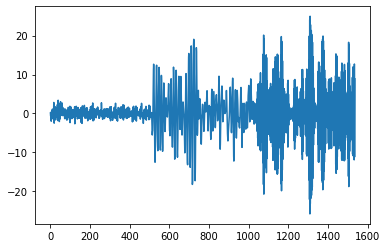

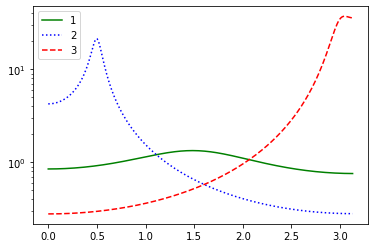

In [12]:
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a=[
    [1,-0.0707,0.2500], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

####################################################################
## Generer une serie temporelle (non-stationnaire globalement)
##    composee de 3 blocs stationnaires
####################################################################
####################################################################
## Generation et juxtaposition des 3 blocs de largeur n/3 chacun
t=range(-2,n-1)
y=[k*0 for k in t]
for k in range(1,int(n/3)):
    y[k+1]=-a[0][1]*y[k]-a[0][2]*y[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    y[k+1]=-a[1][1]*y[k]-a[1][2]*y[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    y[k+1]=-a[2][1]*y[k]-a[2][2]*y[k-1]+aleas.gauss(0,1)

y=y[3:]  # suppression des donnees transitoires
t=t[3:]
# Trace- de la serie
plt.plot(t,y,label='Data = juxtapososition de 3 sous-series stationnaires')
plt.show()

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

f,mag=spectre(a[0],a[1],a[2])
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
## Traces des spectres des trois sous-series 
plt.legend(['z1','z2','z3'])
plt.show()